In [10]:
#Saturated Oxygen Data Correction
from oxyfloat import OxyFloat, RequiredVariableNotPresent, OpenDAPServerError

of = OxyFloat()

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
oga_floats = of.get_oxy_floats()

In [24]:
oga_floats[:10]

['5900245',
 '4900637',
 '4900497',
 '2900460',
 '4900651',
 '4900652',
 '5900420',
 '5900421',
 '5900422',
 '3900274']

In [20]:
test_file = '.nc'

In [23]:
y = []

for dac_url in of.get_dac_urls(oga_floats):
    for profile_url in of.get_profile_opendap_urls(dac_url):
        if test_file:
            if not profile_url.endswith(test_file):
                continue
        print 'Reading data from ...%s', profile_url[40:]
        try:
            d = of.get_profile_data(profile_url)
            y.append(d)
        except RequiredVariableNotPresent as e:
            print e
        except OpenDAPServerError as e:
            print e
    break

Reading data from ...%s IOLIS-ARGO-GDAC-OBS/aoml/1900722/profiles/MD1900722_135.nc
Reading data from ...%s IOLIS-ARGO-GDAC-OBS/aoml/1900722/profiles/MD1900722_134.nc
Reading data from ...%s IOLIS-ARGO-GDAC-OBS/aoml/1900722/profiles/MD1900722_133.nc
Reading data from ...%s IOLIS-ARGO-GDAC-OBS/aoml/1900722/profiles/MD1900722_132.nc
Reading data from ...%s IOLIS-ARGO-GDAC-OBS/aoml/1900722/profiles/MD1900722_131.nc
Reading data from ...%s IOLIS-ARGO-GDAC-OBS/aoml/1900722/profiles/MD1900722_130.nc
Reading data from ...%s IOLIS-ARGO-GDAC-OBS/aoml/1900722/profiles/MD1900722_129.nc
Reading data from ...%s IOLIS-ARGO-GDAC-OBS/aoml/1900722/profiles/MD1900722_128.nc
Reading data from ...%s IOLIS-ARGO-GDAC-OBS/aoml/1900722/profiles/MD1900722_127.nc
Reading data from ...%s IOLIS-ARGO-GDAC-OBS/aoml/1900722/profiles/MD1900722_126.nc
Reading data from ...%s IOLIS-ARGO-GDAC-OBS/aoml/1900722/profiles/MD1900722_125.nc
Reading data from ...%s IOLIS-ARGO-GDAC-OBS/aoml/1900722/profiles/MD1900722_124.nc
Read

KeyboardInterrupt: 

In [66]:
# Demonstrate reading the data
print d['p'][0]['long_name'] + ' (' + d['p'][0]['units'] + ')'
print d['p'][1][:10]
print d['o'][0]['long_name'] + ' (' + d['o'][0]['units'] + ')'
print d['o'][1][:10]

SEA PRESSURE (decibar)
[  4.5          6.20000029   9.40000057  14.60000038  19.5         24.59999847
  29.5         34.70000076  39.39999771  44.39999771]
DISSOLVED OXYGEN (micromole/kg)
[ 190.63000488  190.19000244  187.94000244  185.36999512  196.07000732
  198.92999268  206.1000061   192.66999817  177.00999451  159.25999451]


In [ ]:
#Now make a loop that would make an average for all of the oxygen data

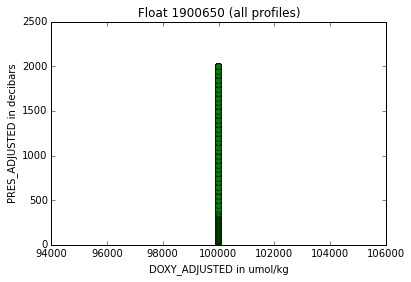

In [18]:
for prof in y:
    plot(prof['o'][1] , prof['p'][1] , 'o')

title('Float 1900650 (all profiles)')
xlabel('DOXY_ADJUSTED in umol/kg')
ylabel('PRES_ADJUSTED in decibars')

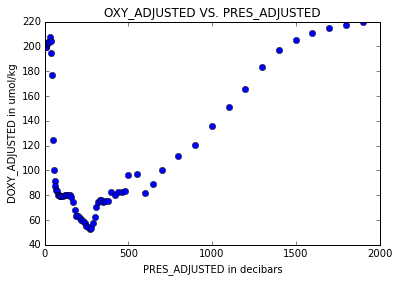

In [25]:
plot(d['p'][1][:] , d['o'][1][:] , 'o')
title('OXY_ADJUSTED VS. PRES_ADJUSTED')
ylabel('DOXY_ADJUSTED in umol/kg')
xlabel('PRES_ADJUSTED in decibars')

The code below is form the old notebook. Some of it may be folded into oxyfloat functions.

In [ ]:
floatLookup = {}
for url in urls:
    print url
    ds = Dataset(url)
    floatNum = url.split('/')[9]
    print floatNum
    p,t,s,o = (ds.variables['PRES_ADJUSTED'][0][0], ds.variables['TEMP_ADJUSTED'][0][0], 
               ds.variables['PSAL_ADJUSTED'][0][0], ds.variables['DOXY_ADJUSTED'][0][0])
    lat,lon,mtime = (ds.variables['LATITUDE'][0], ds.variables['LONGITUDE'][0], ds.variables['JULD'][0])
    
    # Convert o from micromol/kg to ml/l 
    ##perc_sat = 100 * convertTomll(o) / satO2(s,t) 
    print s,t,perc_sat
    floatLookup[floatNum] = (p,t,s,o,lat,lon,mtime)

In [ ]:
floatLookup

In [ ]:
p,t,s,o = (ds.variables['PRES_ADJUSTED'][0][0], ds.variables['TEMP_ADJUSTED'][0][0], ds.variables['PSAL_ADJUSTED'][0][0], ds.variables['DOXY_ADJUSTED'][0][0])

In [ ]:
p,t,s,o

In [ ]:
lat,lon,mtime = (ds.variables['LATITUDE'][0], ds.variables['LONGITUDE'][0], ds.variables['JULD'][0])

In [ ]:
lat,lon,mtime

In [ ]:
oxygen arange(0. , 651. , 350.) #In umol/kg

In [3]:
oxygen = arange(0. , 651. , 50.) #In umol/kg
pressure = arange(0. , 13001. , 1000.) #In decibars

In [4]:
oxygen

array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.])

In [5]:
pressure

array([     0.,   1000.,   2000.,   3000.,   4000.,   5000.,   6000.,
         7000.,   8000.,   9000.,  10000.,  11000.,  12000.,  13000.])

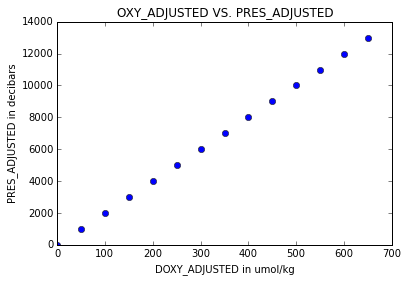

In [6]:
plot(oxygen , pressure , 'o')
title('OXY_ADJUSTED VS. PRES_ADJUSTED')
xlabel('DOXY_ADJUSTED in umol/kg')
ylabel('PRES_ADJUSTED in decibars')

In [7]:
oxy = array([650. , 532.1 , 420.9 , 357.43 , 231.2 , 101.1 , 85.4])


pres = array([12000. , 8943.32 , 5421.8 , 4932.7 , 3547.19 , 2017.69 , 958.3])

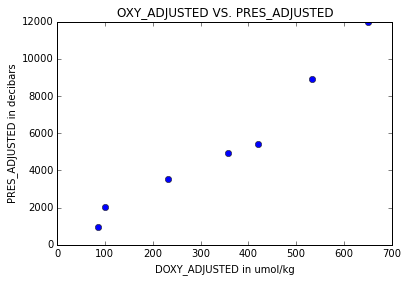

In [8]:
plot(oxy , pres , 'o')
title('OXY_ADJUSTED VS. PRES_ADJUSTED')
xlabel('DOXY_ADJUSTED in umol/kg')
ylabel('PRES_ADJUSTED in decibars')

In [20]:
y = []

x = arange(1 , 10)

for x in range(10):
    y.append(x)

In [21]:
print y

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
